In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
obs_data_dir = '/home/user1/Documents/PhD/observational_data/obs_spectra/wiserep/SN2007Y/'
data_obs = []
names = []
counter = 0
for file in os.listdir(obs_data_dir):
    if '.dat' in file and '7-02-' not in file:
        counter += 1
        data_obs.append(np.loadtxt(obs_data_dir + file))
        names.append(file)
data_obs = np.array(data_obs, dtype=object)
if len(data_obs) != counter:
    print('CHECK FILES ARE LOADED CORRECTLY')

In [5]:
sim_data_dir = '/home/user1/Documents/PhD/ARTIS_CCSN_models/s3.5_envel/100_cube/spectra/total_spectrum/'
data_sim = []
for file in os.listdir(sim_data_dir):
    if '.txt' in file:
        data_sim.append(sim_data_dir + file)
data_sim = sorted(data_sim)

In [21]:
def plot_spectra(spectra):
    plt.plot(spectra[:,0], spectra[:,1])
    plt.xlim(np.max([2800,int(np.min(spectra[:,0]))]),np.min([11000,int(np.max(spectra[:,0]))]))
    plt.xlabel('Wavelength, $\AA$')
    plt.ylabel(r'F$_{\lambda}$ at 1 Mpc [erg/s/cm$^2$/$\AA$]')
    plt.show()
    plt.clf()

def plot_data(array):
    plt.plot(array[:,0], array[:,1])
    plt.xlabel('Wavelength, $\AA$')
    plt.ylabel(r'F$_{\lambda}$ at 1 Mpc [erg/s/cm$^2$/$\AA$]')
    plt.show()
    plt.clf()

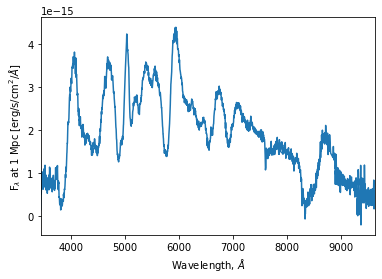

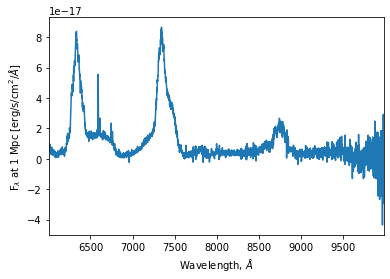

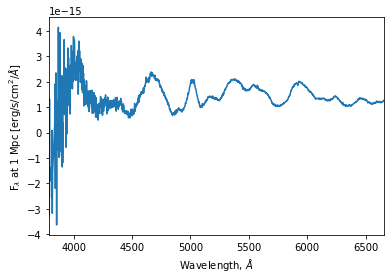

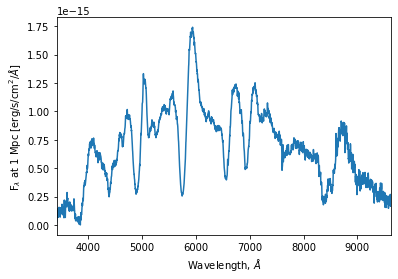

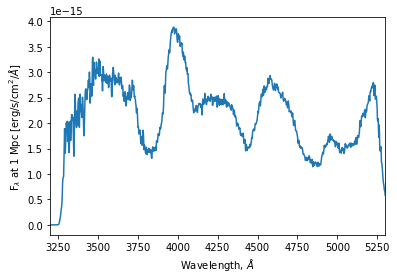

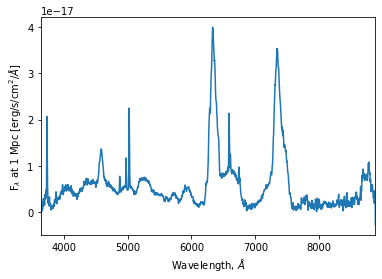

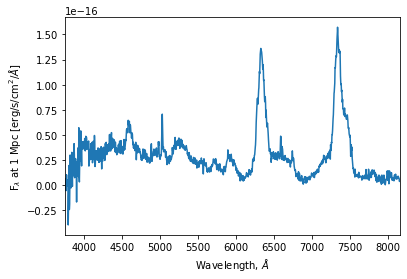

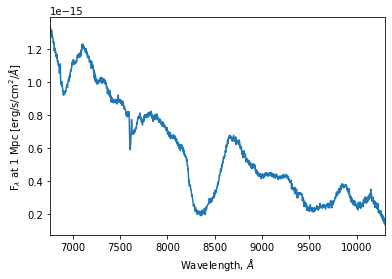

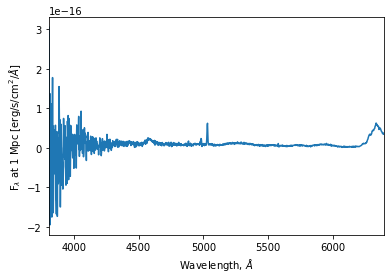

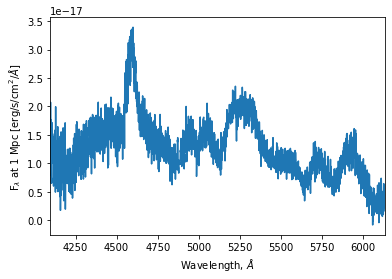

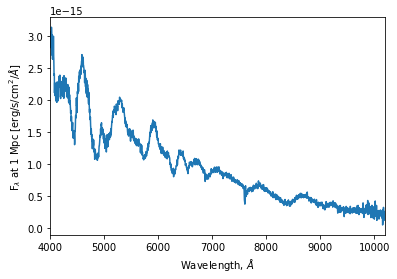

<Figure size 432x288 with 0 Axes>

In [22]:
for row in data_obs:
    plot_spectra(row)

In [81]:
relevant_obs = []
counter = 0
for file in names:
    if '03' in file:
        relevant_obs.append([file, counter])
    counter += 1

In [82]:
relevant_obs = sorted(relevant_obs)
print(relevant_obs)

[['2007Y_2007-03-04_00-00-00_ESO-NTT_EMMI_SUSPECT.dat', 4], ['2007Y_2007-03-04_00-00-00_ESO-NTT_EMMI_SUSPECT_0.dat', 10], ['2007Y_2007-03-11_00-00-00_Magellan-Baade_IMACS_SUSPECT.dat', 2], ['2007Y_2007-03-11_00-00-00_Magellan-Baade_IMACS_SUSPECT_0.dat', 7], ['2007Y_2007-03-14_00-00-00_LCO-duPont_BC-duPont_SUSPECT.dat', 0], ['2007Y_2007-03-19_00-00-00_LCO-duPont_BC-duPont_SUSPECT.dat', 3]]


In [83]:
peak_light_obs = 7
peak_light_sim = 14
times = []
indices = []
for file in relevant_obs:
    date = int(file[0][14:16])
    date_post_peak_obs = date - peak_light_obs
    date_post_peak_sim = 14 + date_post_peak_obs
    times.append(date_post_peak_sim)
    indices.append(int(file[1]))
print(times)

[11, 11, 18, 18, 21, 26]


0 11


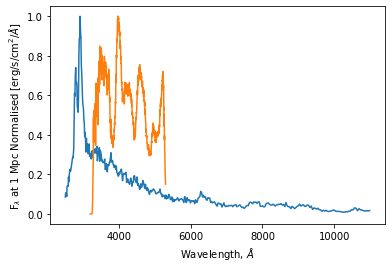

11 11


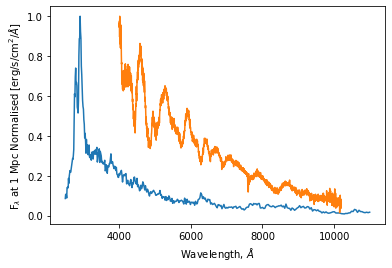

11 18


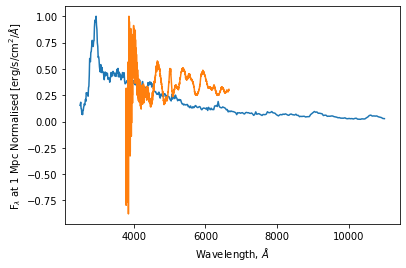

18 18


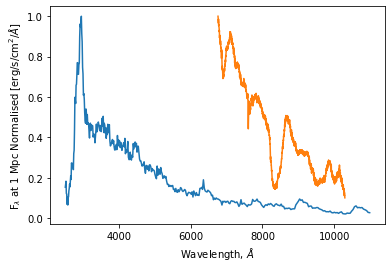

18 21


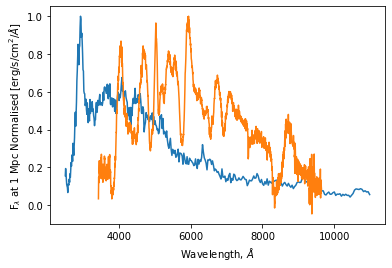

21 26


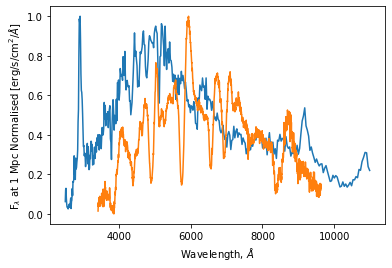

<Figure size 432x288 with 0 Axes>

In [90]:
counter = 0
temp = 0
for i in times:
    print(temp, i)
    ds = np.loadtxt(data_sim[i-2], skiprows=1, delimiter=',')
    do = data_obs[indices[counter]]
    ds[:,1] = ds[:,1]/(np.max(ds[:,1]))
    do[:,1] = do[:,1]/(np.max(do[:,1]))
    plt.plot(ds[:,0], ds[:,1])
    plt.plot(do[:,0], do[:,1])
    plt.xlabel('Wavelength, $\AA$')
    plt.ylabel(r'F$_{\lambda}$ at 1 Mpc Normalised [erg/s/cm$^2$/$\AA$]')
    if temp == i:
        plt.savefig('spec_comp_' + str(i) + '_alt.png')
    else:
        plt.savefig('spec_comp_' + str(i) + '.png')
    plt.show()
    plt.clf()
    counter += 1
    temp = i

0 11


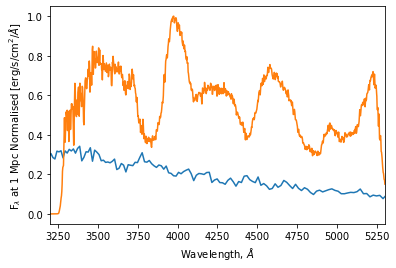

11 11


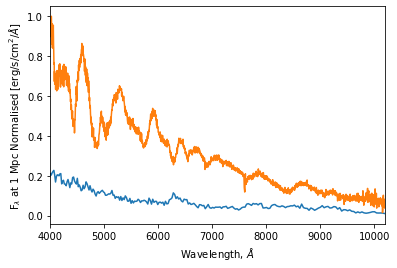

11 18


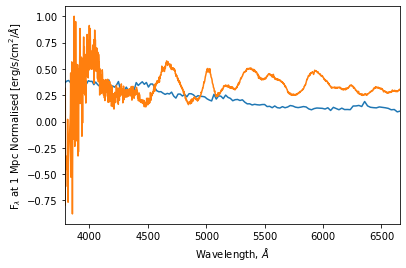

18 18


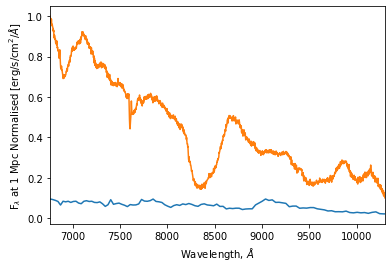

18 21


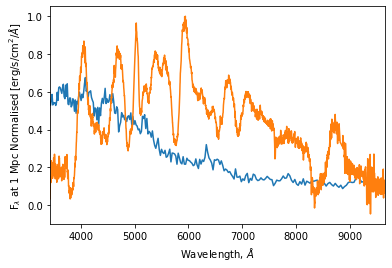

21 26


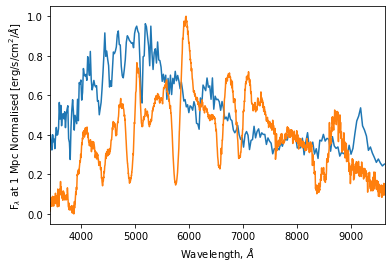

<Figure size 432x288 with 0 Axes>

In [89]:
counter = 0
temp = 0
for i in times:
    print(temp, i)
    ds = np.loadtxt(data_sim[i-2], skiprows=1, delimiter=',')
    do = data_obs[indices[counter]]
    ds[:,1] = ds[:,1]/(np.max(ds[:,1]))
    do[:,1] = do[:,1]/(np.max(do[:,1]))
    plt.plot(ds[:,0], ds[:,1])
    plt.plot(do[:,0], do[:,1])
    plt.xlabel('Wavelength, $\AA$')
    plt.ylabel(r'F$_{\lambda}$ at 1 Mpc Normalised [erg/s/cm$^2$/$\AA$]')
    plt.xlim(np.max([np.min(ds[:,0]), np.min(do[:,0])]), np.min([np.max(ds[:,0]), np.max(do[:,0])]))
    if temp == i:
        plt.savefig('spec_comp_restricted_range_' + str(i) + '_alt.png')
    else:
        plt.savefig('spec_comp_restricted_range_' + str(i) + '.png')
    plt.show()
    plt.clf()
    counter += 1
    temp = i